In [15]:
from nuisancelib import *
%matplotlib inline

In [24]:
real_files = pd.read_csv('../output/real_output.csv')
real_df = pd.DataFrame(real_files,columns=['Date', 'sid', 'ses', 'snr_total', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8', 'IOPD1', 'IOPD2',
                                'IOPD3', 'IOPD4', 'IOPD5', 'IOPD6'])

segstats = pd.read_csv('../output/segstats-volume.csv')
seg_df = pd.DataFrame(segstats,columns=['Date', 'sid', 'ses', 'Background', "Left-Accumbens-area", 
                                        "Left-Amygdala", "Left-Caudate", "Left-Hippocampus", "Left-Pallidum",
                                        "Left-Putamen", "Left-Thalamus-Proper", "Right-Accumbens-area", 
                                        "Right-Amygdala", "Right-Caudate", "Right-Hippocampus", "Right-Pallidum",
                                        "Right-Putamen", "Right-Thalamus-Proper", "csf", "gray", "white"])
merged_df = pd.merge(real_df, seg_df, on=['sid', 'ses'], how='outer')
merged_df['Date_x'] = pd.to_datetime(merged_df['Date_x'], format="%Y%m%d")
merged_df.set_index('Date_x',inplace=True)
# merged_df

In [25]:
# df3['Date'] = pd.to_datetime(df3['Date'], format="%Y%m%d")
df3 = pd.read_csv('../data/extractions/anat.csv', parse_dates=['Date'])
df3.set_index('Date', inplace=True)
df_reindexed = df3.reindex(pd.date_range(start=df3.index.min(), end=df3.index.max(), freq='1D'))  
df_reindexed.index.names = ['Date_x']
interpolated_df = df_reindexed.interpolate(method='time')
# interpolated_df

In [26]:
super_df = pd.merge(merged_df, interpolated_df, left_index=True, right_index=True, suffixes = ("_real", "_qa"))
# super_df

In [27]:
demographic_df = pd.read_csv('../data/dbic/bids/participants.tsv', sep='\t')
demographic_df = demographic_df.rename(index=str, columns={"participant_id": "sid"})
final_df = super_df.join(demographic_df.set_index('sid'), on='sid', how='left')
# final_df

In [28]:
expanded_df = pd.DataFrame(final_df,columns=['sid', 'ses', 'Background', "Left-Accumbens-area", 
                                        "Left-Amygdala", "Left-Caudate", "Left-Hippocampus", "Left-Pallidum",
                                        "Left-Putamen", "Left-Thalamus-Proper", "Right-Accumbens-area", 
                                        "Right-Amygdala", "Right-Caudate", "Right-Hippocampus", "Right-Pallidum",
                                        "Right-Putamen", "Right-Thalamus-Proper", "csf", "gray", "white", 'age', 
                                             'sex', 'snr_total_qa', 'IOPD1_real', 'IOPD2_real', 'IOPD3_real', 
                                             'IOPD4_real', 'IOPD5_real', 'IOPD6_real'])
expanded_df = expanded_df.reset_index()
expanded_df = expanded_df.rename(columns={'Date_x': 'Date'})
expanded_df['sex_male'] = [0 for item in range(len(expanded_df))]
expanded_df.sex_male[expanded_df.sex == 'M'] = int(1)
# expanded_df

/home/yoh/anaconda-5.2.0-2.7/envs/nuisance/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [29]:
dicom_data = pd.read_csv('../output/dicom_data.csv')
dicom_data = pd.DataFrame(dicom_data,columns=['sid', 'ses', 'PatientWeight'])
July17_df = pd.merge(expanded_df, dicom_data, on=['sid', 'ses'], how='left')
# July17_df

In [30]:
Oct14_df = pd.DataFrame(July17_df, columns=['Date', 'gray', 'age', 'snr_total_qa', 'IOPD1_real', 'IOPD2_real', 'IOPD3_real', 
                                              'IOPD4_real', 'IOPD5_real', 'IOPD6_real', 'sex_male', 'PatientWeight', 
                                              'Seasonal (sin)', 'Seasonal (cos)'])

/home/yoh/proj/experiments/nuisance/ipy/nuisancelib.py:131: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  model_df['Date'] = model_df['Date'].map(pd.datetime.toordinal)


Statistically significant variables: ['const', 'age', 'sex_male', 'PatientWeight', 'Seasonal (sin)', 'snr_total_qa', 'IOPD2_real']
FDR-corrected p-values:
            age | Original  p-value: 0.000777 | FDR-corrected p-value:  0.00233**
       sex_male | Original  p-value:  0.00354 | FDR-corrected p-value:  0.00532**
  PatientWeight | Original  p-value: 1.47e-07 | FDR-corrected p-value: 8.82e-07**
   snr_total_qa | Original  p-value:  0.00157 | FDR-corrected p-value:  0.00315**
           IOPD | Original  p-value:   0.0565 | FDR-corrected p-value:   0.0565
       Seasonal | Original  p-value:   0.0293 | FDR-corrected p-value:   0.0352**


                            OLS Regression Results                            
Dep. Variable:                   gray   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.615
Date:                Thu, 11 Jun 2020

const             1.756818e-174
age                7.767962e-04
sex_male           3.543576e-03
PatientWeight      1.470081e-07
Seasonal (sin)     3.422566e-02
Seasonal (cos)     1.063561e-01
snr_total_qa       1.573624e-03
IOPD1_real         7.120256e-01
IOPD2_real         1.707020e-02
IOPD3_real         7.859467e-02
IOPD4_real         8.073063e-01
IOPD5_real         8.487218e-01
IOPD6_real         6.864041e-02
dtype: float64

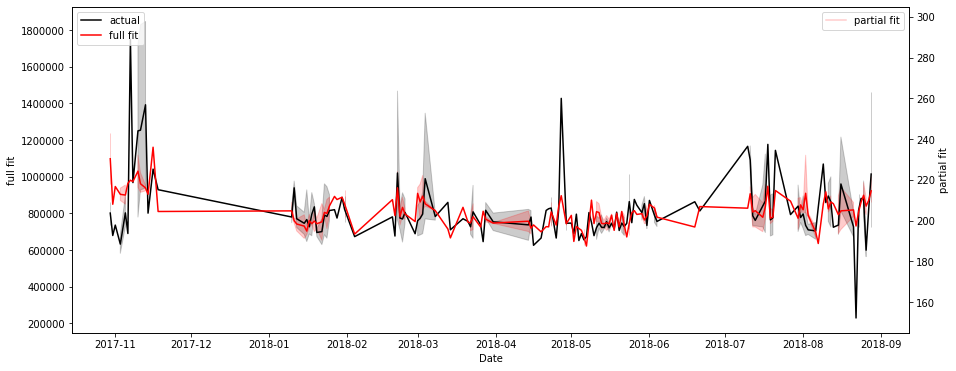

In [33]:
# WITH BOTH SNR_TOTAL_QA AND SEASONAL DATA;
regress('gray', Oct14_df, qa=False, real_data = True).pvalues

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Statistically significant variables: ['const', 'age', 'sex_male', 'PatientWeight', 'snr_total_qa']


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for m

FDR-corrected p-values:
            age | Original p-value: 0.0009694690896371908 | FDR-corrected p-value: 0.002423672724092977, True
       sex_male | Original p-value: 0.004205968747149754 | FDR-corrected p-value: 0.007009947911916258, True
  PatientWeight | Original p-value: 2.424578136696516e-07 | FDR-corrected p-value: 1.212289068348258e-06, True
   snr_total_qa | Original p-value: 0.013494971816534897 | FDR-corrected p-value: 0.01686871477066862, True
           IOPD | Original p-value:  0.08512952298835383 | FDR-corrected p-value: 0.08512952298835383, False


                            OLS Regression Results                            
Dep. Variable:                   gray   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     6.514
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           6.12e-09
Time:                        16:

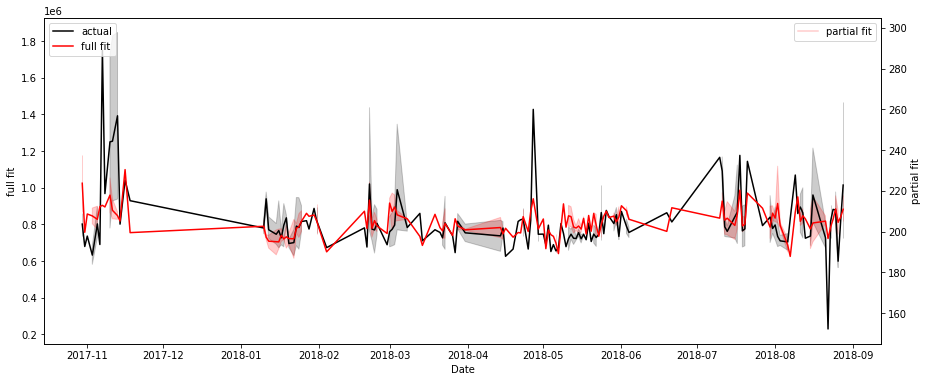

In [12]:
# WITH ONLY SNR_TOTAL_QA
regress('gray', Oct14_df, qa=False, real_data = True)

/home/yoh/proj/experiments/nuisance/ipy/nuisancelib.py:131: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  model_df['Date'] = model_df['Date'].map(pd.datetime.toordinal)


Statistically significant variables: ['const', 'age', 'sex_male', 'PatientWeight', 'Seasonal (sin)', 'snr_total_qa', 'IOPD2_real']
FDR-corrected p-values:
            age | Original  p-value: 0.000777 | FDR-corrected p-value:  0.00233**
       sex_male | Original  p-value:  0.00354 | FDR-corrected p-value:  0.00532**
  PatientWeight | Original  p-value: 1.47e-07 | FDR-corrected p-value: 8.82e-07**
   snr_total_qa | Original  p-value:  0.00157 | FDR-corrected p-value:  0.00315**
           IOPD | Original  p-value:   0.0565 | FDR-corrected p-value:   0.0565
       Seasonal | Original  p-value:   0.0293 | FDR-corrected p-value:   0.0352**


                            OLS Regression Results                            
Dep. Variable:                   gray   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.615
Date:                Thu, 11 Jun 2020

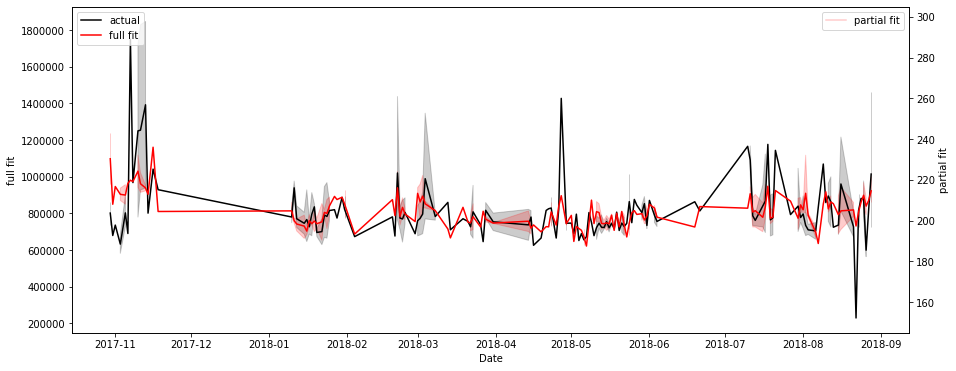

In [34]:
# WITH ONLY SEASONAL
regress('gray', Oct14_df, qa=False, real_data = True)

/home/yoh/proj/experiments/nuisance/ipy/nuisancelib.py:131: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  model_df['Date'] = model_df['Date'].map(pd.datetime.toordinal)


Statistically significant variables: ['const', 'age', 'sex_male', 'PatientWeight', 'Seasonal (sin)', 'snr_total_qa', 'IOPD2_real']
FDR-corrected p-values:
            age | Original  p-value: 0.000777 | FDR-corrected p-value:  0.00233**
       sex_male | Original  p-value:  0.00354 | FDR-corrected p-value:  0.00532**
  PatientWeight | Original  p-value: 1.47e-07 | FDR-corrected p-value: 8.82e-07**
   snr_total_qa | Original  p-value:  0.00157 | FDR-corrected p-value:  0.00315**
           IOPD | Original  p-value:   0.0565 | FDR-corrected p-value:   0.0565
       Seasonal | Original  p-value:   0.0293 | FDR-corrected p-value:   0.0352**


                            OLS Regression Results                            
Dep. Variable:                   gray   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.615
Date:                Thu, 11 Jun 2020

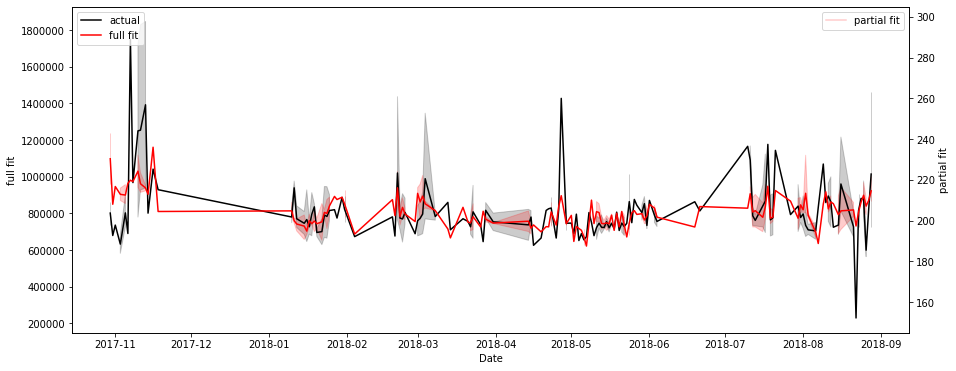

In [35]:
# WITH NEITHER SEASONAL OR SNR_TOTAL_QA
regress('gray', Oct14_df, qa=False, real_data = True)

In [36]:
targets = ['Background', "Left-Accumbens-area", "Left-Amygdala", "Left-Caudate", "Left-Hippocampus", "Left-Pallidum",
                                        "Left-Putamen", "Left-Thalamus-Proper", "Right-Accumbens-area", 
                                        "Right-Amygdala", "Right-Caudate", "Right-Hippocampus", "Right-Pallidum",
                                        "Right-Putamen", "Right-Thalamus-Proper", "csf", "gray", "white"]
scrape_var_significance(targets, 'snr_total_qa', July17_df)

/home/yoh/proj/experiments/nuisance/ipy/nuisancelib.py:131: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  model_df['Date'] = model_df['Date'].map(pd.datetime.toordinal)


,Variable,snr_total_qa p value,R2 value
0,Background,0.268868,0.466775
1,Left-Accumbens-area,0.980640,0.103959
2,Left-Amygdala,0.462431,0.328001
3,Left-Caudate,0.088055,0.215853
4,Left-Hippocampus,0.464155,0.217866
5,Left-Pallidum,0.563611,0.519885
6,Left-Putamen,0.464372,0.261736
7,Left-Thalamus-Proper,0.300834,0.428157
8,Right-Accumbens-area,0.569273,0.146147
9,Right-Amygdala,0.748272,0.333926


In [37]:
from statsmodels.stats.multitest import fdrcorrection
snr_pvals = [0.269, 0.981, 0.462, 0.088, 0.464, 0.564, 0.464, 0.301, 0.569, 0.748, 0.079, 0.276, 0.453, 0.602, 
         0.533, 0.031, 0.002, 0.862]
fdrcorrection(snr_pvals)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False]),
 array([0.7224    , 0.981     , 0.7224    , 0.396     , 0.7224    ,
        0.7224    , 0.7224    , 0.7224    , 0.7224    , 0.8415    ,
        0.396     , 0.7224    , 0.7224    , 0.7224    , 0.7224    ,
        0.279     , 0.036     , 0.91270588]))

In [39]:
scrape_var_significance(targets, 'Seasonal', July17_df)

/home/yoh/proj/experiments/nuisance/ipy/nuisancelib.py:131: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  model_df['Date'] = model_df['Date'].map(pd.datetime.toordinal)


,Variable,Seasonal p value,R2 value
0,Background,0.1820402468283154,0.466775
1,Left-Accumbens-area,0.8785403210072638,0.103959
2,Left-Amygdala,0.6380391076601278,0.328001
3,Left-Caudate,0.9551548726187826,0.215853
4,Left-Hippocampus,0.1684526092230895,0.217866
5,Left-Pallidum,0.15988662012082297,0.519885
6,Left-Putamen,0.08740580229326132,0.261736
7,Left-Thalamus-Proper,0.21422013426754546,0.428157
8,Right-Accumbens-area,0.04439641850610113,0.146147
9,Right-Amygdala,0.9729593078533307,0.333926


In [40]:
season_pvals = [0.182, 0.879, 0.638, 0.955, 0.168, 0.160, 0.087, 0.214, 0.044, 0.973, 0.893, 0.055, 0.081, 0.362, 
                0.480, 0.059, 0.029, 0.004]
fdrcorrection(season_pvals)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([0.3276    , 0.973     , 0.82028571, 0.973     , 0.3276    ,
        0.3276    , 0.22371429, 0.35018182, 0.2124    , 0.973     ,
        0.973     , 0.2124    , 0.22371429, 0.543     , 0.66461538,
        0.2124    , 0.2124    , 0.072     ]))

In [41]:
import pandas as pd, statsmodels as sm
pd.show_versions();
print("Statsmodels:  ", sm.__version__)


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.7.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.6.0-1-amd64
machine          : x86_64
processor        : 
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.3
numpy            : 1.18.1
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 47.1.1.post20200604
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.13.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : None
matplotlib       : 3.1.3
numexpr      